# ASSIGNMENT NO 3

# Name : Allan Robey
# Roll No: 22111007

In [1]:
# importing the required libraries...
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Question 1 - Spectrogram of Audio File

The purpose of this question was to record an audio file and plot the corresponding spectrogram.

# Question 1-a


First step in this question was to record my voice in an audio file(CS724A).
For doing this,I have used an andriod app in my mobile.
A short sentence(“My name is Allan Robey”) was said and the corresponding audio file was recorded. 


# Question 1-b

A python code has been written which will read the corresponding audio file using Librosa module and the audio file has been visualized. Then short-time fourier transform has been extracted and the spectogram has been calculated. Finally Spectogram has been visualized. The Log-Amplitude Spectogram and Log-Frequency have also been visualized.


# Loading audio file with librosa

In [2]:
audio_file = "audioCS724A.wav"
ipd.Audio(audio_file)

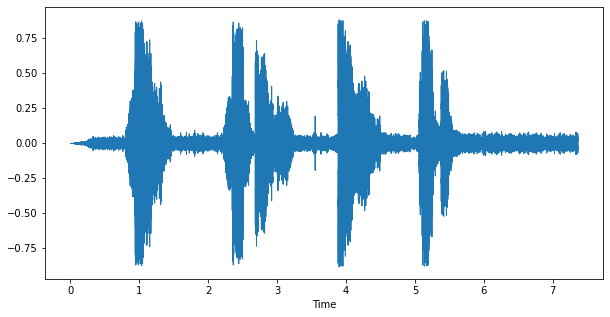

In [3]:
x, sr = librosa.load(audio_file)
plt.figure(figsize=(10, 5))
librosa.display.waveshow(x, sr=sr)

# Extracting Short-Time Fourier Transform


In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_x.shape


(1025, 317)

# Calculating the spectrogram

In [5]:
Y_scale = np.abs(S_x) ** 2

# Visualizing the spectrogram


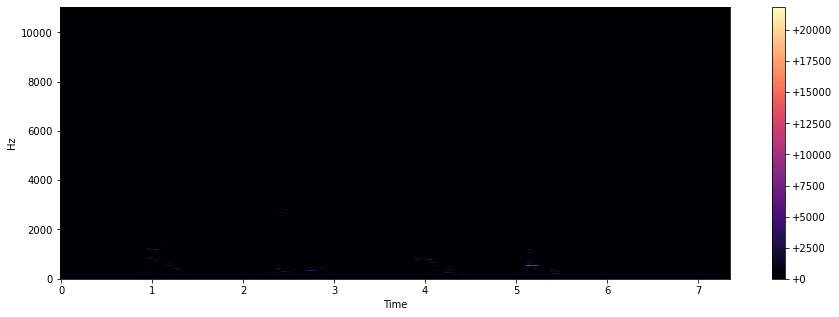

In [6]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

plot_spectrogram(Y_scale, sr, HOP_SIZE)


# Log-Amplitude Spectrogram

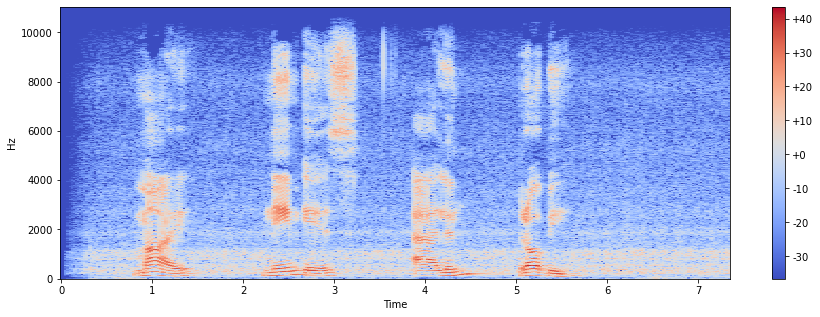

In [7]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)


# Log-Frequency Spectrogram

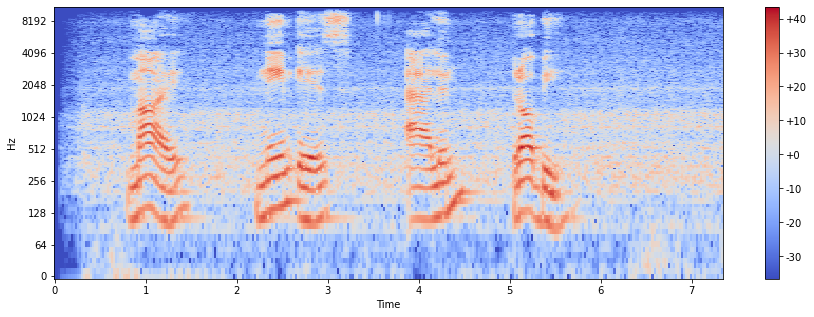

In [8]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")


# Question 1-c

From the above spectogram it can be clearly observed that it comprices of 5 spectrums of frequencies each corresponding to a word of the audio file "My name is Allan Robey" as it varies with time.

# Question 2 - Implementing a Human Posture Detection app

The purpose of this question was to use the accelerometer sensor of our smartphone to find out 
some simple human posture like sitting, standing and sleeping

# Question 2-a

Using the Physics Toolbox in my smartphone in this question.Now taking the smartphone in my trouser pocket at any particular orientation, the accelerometer samples while I am sitting,  standing and lying down straight has been recorded ,and thereby plotting them. Also the corresponding patterns while performing these actions has been observed.

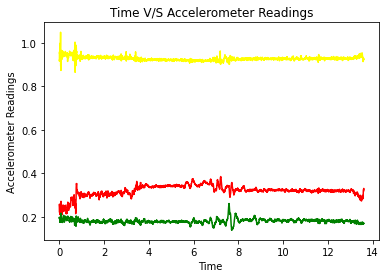

In [9]:
# Recording and reading values while in sitting position from sitting1.csv file...
data = pd.read_csv('sitting1.csv')
# x , y1, y2, y3 are list which contains the values of corresponding time, acceleration along x-axis , y-axis 
# and z-axis respectively.
x = data['time'].tolist()
y1 = data['gFx'].tolist()
y2 = data['gFy'].tolist()
y3 = data['gFz'].tolist()

# red, green and yellow plot lines represent the values of corresponding acceleration along x-axis , y-axis 
# and z-axis respectively.
plt.plot(x[:], y1[:], color = "red")
plt.plot(x[:], y2[:], color = "green")
plt.plot(x[:], y3[:], color = "yellow")
plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Accelerometer Readings')
plt.show()

Here it can be observed that acceleration 'g' is along z-axis and slight variations in acceleration along x-axis and y-axis.

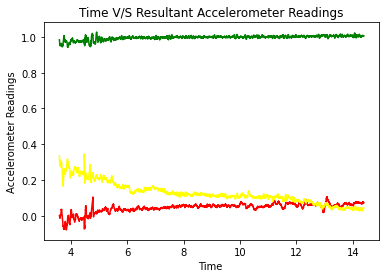

In [10]:
# Recording and reading values while in standing position from standing1.csv file ...
data = pd.read_csv('standing1.csv')
x = data['time'].tolist()
x=x[1500:6000]

# x , y1, y2, y3 are list which contains the values of corresponding time, acceleration along x-axis , y-axis 
# and z-axis respectively.
y1 = data['gFx'].tolist()
y2 = data['gFy'].tolist()
y3 = data['gFz'].tolist()

# red, green and yellow plot lines represent the values of corresponding acceleration along x-axis , y-axis 
# and z-axis respectively.
plt.plot(x, y1[1500:6000], color="red")
plt.plot(x, y2[1500:6000], color= "green")
plt.plot(x, y3[1500:6000], color = "yellow")

plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

Here it can be observed that acceleration 'g' is along y-axis and slight variations in acceleration along x-axis and z-axis.

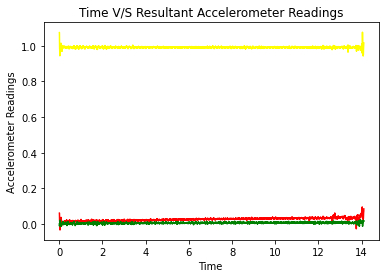

In [11]:

# Recording and reading values while laying down straight from sleeping1.csv file ...
data = pd.read_csv('sleeping1.csv')

# x , y1, y2, y3 are list which contains the values of corresponding time, acceleration along x-axis , y-axis 
# and z-axis respectively.
x = data['time'].tolist()
y1 = data['gFx'].tolist()
y2 = data['gFy'].tolist()
y3 = data['gFz'].tolist()

# red, green and yellow plot lines represent the values of corresponding acceleration along x-axis , y-axis 
# and z-axis respectively.
plt.plot(x, y1, color="red")
plt.plot(x, y2, color="green")
plt.plot(x, y3, color= "yellow")

plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()


Here it can be observed that acceleration 'g' is along z-axis and almost zero acceleration along x-axis and y-axis.

# Question 2 - b

Using the PhonePi App for streaming the data to our system.

# Recording the samples while laying down straight


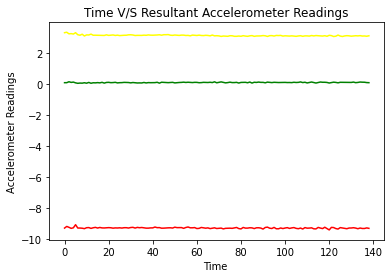

In [12]:

Sleeping_X = []
Sleeping_Y =[]
Sleeping_Z=[]

# Reading the streaming data while laying down straight position from Sleeping.txt file...
with open("Sleeping.txt", 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')

    for ROWS in plotting:
        Sleeping_X.append(float(ROWS[0]))
        Sleeping_Y.append(float(ROWS[1]))
        Sleeping_Z.append(float(ROWS[2]))
# Obtaining the minimum and maximum values of acceleration along x-axis, y-axis and z-axis while laying down straight.        
min_sleeping_x = min(Sleeping_X)
max_sleeping_x = max(Sleeping_X)
min_sleeping_y = min(Sleeping_Y) 
max_sleeping_y = max(Sleeping_Y) 
min_sleeping_z = min(Sleeping_Z) 
max_sleeping_z = max(Sleeping_Z)
x = []
for i in range(len(Sleeping_X)):
    x.append(i)
plt.plot(x, Sleeping_X, color="red")
plt.plot(x, Sleeping_Y, color="green")
plt.plot(x, Sleeping_Z, color= "yellow")

plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

# Recording the samples while Standing

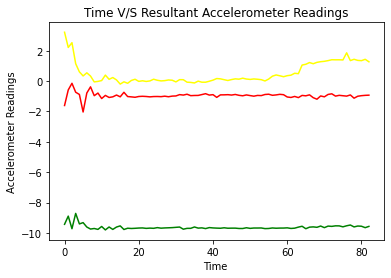

In [13]:

Standing_X = []
Standing_Y =[]
Standing_Z=[]

# Reading the streaming data in standing position from standing.txt file...
with open("Standing.txt", 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')

    for ROWS in plotting:
        Standing_X.append(float(ROWS[0]))
        Standing_Y.append(float(ROWS[1]))
        Standing_Z.append(float(ROWS[2]))
# Obtaining the minimum and maximum values of acceleration along x-axis, y-axis and z-axis in standing position.        
min_standing_x = min(Standing_X)
max_standing_x = max(Standing_X)
min_standing_y = min(Standing_Y) 
max_standing_y = max(Standing_Y) 
min_standing_z = min(Standing_Z) 
max_standing_z = max(Standing_Z) 
x = []
for i in range(len(Standing_X)):
    x.append(i)
plt.plot(x, Standing_X, color="red")
plt.plot(x, Standing_Y, color="green")
plt.plot(x, Standing_Z, color= "yellow")

plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

# Recording the samples while Sitting

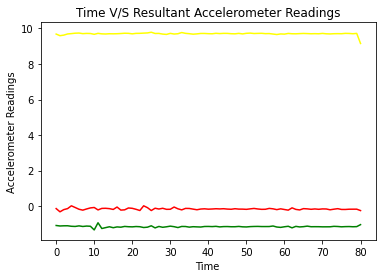

In [14]:

Sitting_X = []
Sitting_Y =[]
Sitting_Z=[]

# Reading the streaming data in sitting position from Sitting.txt file ...
with open("Sitting.txt", 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')

    for ROWS in plotting:
        Sitting_X.append(float(ROWS[0]))
        Sitting_Y.append(float(ROWS[1]))
        Sitting_Z.append(float(ROWS[2]))
# Obtaining the minimum and maximum values of acceleration along x-axis, y-axis and z-axis in sitting position.        
min_sitting_x = min(Sitting_X)
max_sitting_x = max(Sitting_X)
min_sitting_y = min(Sitting_Y) 
max_sitting_y = max(Sitting_Y) 
min_sitting_z = min(Sitting_Z) 
max_sitting_z = max(Sitting_Z)
x = []
for i in range(len(Sitting_X)):
    x.append(i)
plt.plot(x, Sitting_X, color="red")
plt.plot(x, Sitting_Y, color="green")
plt.plot(x, Sitting_Z, color= "yellow")

plt.xlabel('Time ')
# naming the y axis
plt.ylabel('Accelerometer Readings')
# giving a title to my graph
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

# Finding out among these three human postures in real time

Here I have determined the human postures for the data collected in real time using PhonePi app and classified the human postures as Sitting, Standing and Laying Down Straight on the basis of the data collected previously.

In [15]:
import csv

# AX, AY and AZ stores the values of acceleration along x-axis, y-axis and z-axis respectively
AX = []
AY =[]
AZ=[]

# Reading the streaming data in different position from Testing.txt file ...
with open("Testing.txt", 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')

    for ROWS in plotting:
        AX.append(float(ROWS[0]))
        AY.append(float(ROWS[1]))
        AZ.append(float(ROWS[2]))

# Using the range of acceleration along x-axis, y-axis and z-axis to determine the patterns of streaming data
for i in range(len(AX)):
    if ((AX[i] >= min_standing_x and AX[i] <= max_standing_x) and (AY[i] >= min_standing_y and AY[i] <= max_standing_y) and (AZ[i] >= min_standing_z and AZ[i] <= max_standing_z)):
        print("AX: ",AX[i]," AY: ",AY[i]," AZ: ",AZ[i],"---Standing")
    elif ((AX[i] >= min_sitting_x and AX[i] <= max_sitting_x) and (AY[i] >= min_sitting_y and AY[i] <= max_sitting_y) and (AZ[i] >= min_sitting_z and AZ[i] <= max_sitting_z)):
        print("AX: ",AX[i]," AY: ",AY[i]," AZ: ",AZ[i],"---Sitting")
    elif ((AX[i] >= min_sleeping_x and AX[i] <= max_sleeping_x) and (AY[i] >= min_sleeping_y and AY[i] <= max_sleeping_y) and (AZ[i] >= min_sleeping_z and AZ[i] <= max_sleeping_z)):
        print("AX: ",AX[i]," AY: ",AY[i]," AZ: ",AZ[i],"---Laying Down Straight")
    else:
        print("AX: ",AX[i]," AY: ",AY[i]," AZ: ",AZ[i],"---Pattern Not Recognized")

AX:  -0.541015625  AY:  -9.770706176757812  AZ:  0.1826629638671875 ---Standing
AX:  -0.7695159912109375  AY:  -9.695343017578125  AZ:  0.3980255126953125 ---Standing
AX:  -1.00042724609375  AY:  -9.657058715820312  AZ:  0.4877471923828125 ---Standing
AX:  -1.0554656982421875  AY:  -9.66064453125  AZ:  0.4398956298828125 ---Standing
AX:  -0.641510009765625  AY:  -9.663040161132812  AZ:  0.5152740478515625 ---Standing
AX:  -0.7611541748046875  AY:  -9.6546630859375  AZ:  0.652862548828125 ---Standing
AX:  -0.6522674560546875  AY:  -9.587661743164062  AZ:  0.5990142822265625 ---Standing
AX:  -0.518280029296875  AY:  -9.787460327148438  AZ:  0.8406982421875 ---Standing
AX:  -0.959747314453125  AY:  -9.624755859375  AZ:  0.53680419921875 ---Standing
AX:  -0.9430084228515625  AY:  -9.7264404296875  AZ:  0.3166656494140625 ---Standing
AX:  -0.689361572265625  AY:  -9.688156127929688  AZ:  0.1886444091796875 ---Standing
AX:  -0.7264556884765625  AY:  -9.716873168945312  AZ:  0.502105712890625

AX:  -0.1186676025390625  AY:  -1.1613311767578125  AZ:  9.695327758789062 ---Sitting
AX:  -0.1749114990234375  AY:  -1.1433868408203125  AZ:  9.721649169921875 ---Sitting
AX:  -0.241912841796875  AY:  -1.1541595458984375  AZ:  9.724044799804688 ---Sitting
AX:  0.0225067138671875  AY:  -1.19842529296875  AZ:  9.736007690429688 ---Sitting
AX:  -0.0815887451171875  AY:  -1.179290771484375  AZ:  9.746780395507812 ---Sitting
AX:  -0.24310302734375  AY:  -1.1015167236328125  AZ:  9.785064697265625 ---Sitting
AX:  -0.1138916015625  AY:  -1.2199554443359375  AZ:  9.715667724609375 ---Sitting
AX:  -0.1581573486328125  AY:  -1.13861083984375  AZ:  9.719268798828125 ---Sitting
AX:  -0.1162872314453125  AY:  -1.185272216796875  AZ:  9.68096923828125 ---Sitting
AX:  -0.1761016845703125  AY:  -1.157745361328125  AZ:  9.66302490234375 ---Sitting
AX:  -0.172515869140625  AY:  -1.121856689453125  AZ:  9.721649169921875 ---Sitting
AX:  -0.0457000732421875  AY:  -1.151763916015625  AZ:  9.6845703125 ---

AX:  -8.231536865234375  AY:  0.068572998046875  AZ:  5.4014129638671875 ---Pattern Not Recognized
AX:  -8.198043823242188  AY:  0.108062744140625  AZ:  5.4002227783203125 ---Pattern Not Recognized
AX:  -8.235122680664062  AY:  0.115234375  AZ:  5.37030029296875 ---Pattern Not Recognized
AX:  -8.16094970703125  AY:  0.074554443359375  AZ:  5.38226318359375 ---Pattern Not Recognized
AX:  -8.1824951171875  AY:  0.1535186767578125  AZ:  5.33441162109375 ---Pattern Not Recognized
AX:  -8.285385131835938  AY:  0.080535888671875  AZ:  5.404998779296875 ---Pattern Not Recognized
AX:  -8.147796630859375  AY:  0.0937042236328125  AZ:  5.3834686279296875 ---Pattern Not Recognized
AX:  -8.162155151367188  AY:  0.126007080078125  AZ:  5.369110107421875 ---Pattern Not Recognized
AX:  -8.235122680664062  AY:  0.127197265625  AZ:  5.3774871826171875 ---Pattern Not Recognized
AX:  -8.153778076171875  AY:  0.1212158203125  AZ:  5.404998779296875 ---Pattern Not Recognized
AX:  -8.174118041992188  AY:  0

The patterns are correctly recognised as sitting,standing and laying down straight.
Patterns are not recognized when the person is walking or in between the transition of a motion or any other motion other than sitting, standing or laying down straight.